In [70]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px

In [71]:
churn_data = pd.read_csv('churn.csv')
churn_data.drop(labels='RowNumber', axis=1,inplace=True)
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [72]:
churn_data.rename(columns={'Exited':'churn'},inplace=True)

In [73]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  churn            10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [74]:
#9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.
exited = pd.DataFrame(churn_data['churn'].value_counts(normalize=True))

px.bar(
    data_frame=exited,
    y='churn',
    text='churn',
    title='Left/remaining customers',
    orientation='v',
    x=['Remaining','Left']
    )

Most of the customers keep loyal to the bank. The churn rate is 20%

In [75]:
#9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. 
# Опишите распределение и сделайте выводы.

high_ballance = churn_data[churn_data['Balance'] > 2_500]

px.histogram(
    data_frame=high_ballance,
    x='Balance',
    title='Distribution of clients',
    )

Balance for clients having above $2500 is exhibiting normal distribution with mean value about $120000.

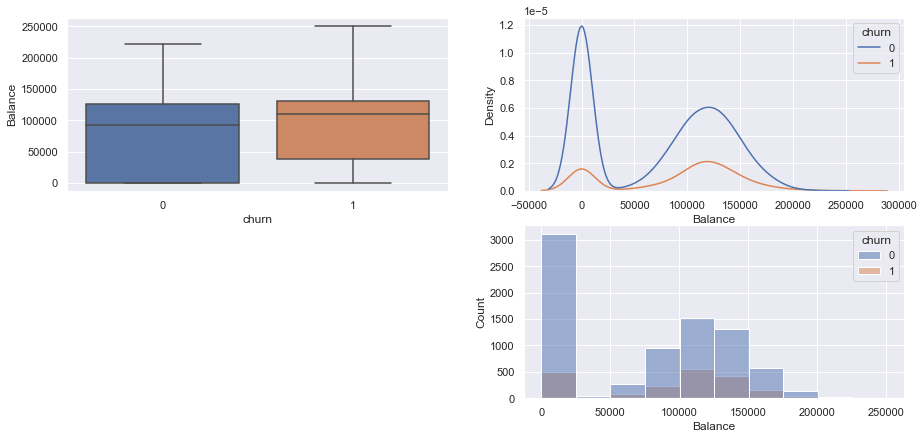

In [76]:
# 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. 
# Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? 
# Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.boxplot(data=churn_data,x='churn',y='Balance')
plt.subplot(2,2,2)

sns.kdeplot(data=churn_data,x='Balance',hue='churn')
plt.subplot(2,2,4)
sns.histplot(data=churn_data,x='Balance',hue='churn',bins=10)
plt.show()

Most of the clients who had left the bank had substantial sums of money on their balance. In fact they were twice more likely to have been using the bank to keep money. Probably this bank's conditions for keeping money on the balance are worse than in the competing organisations.

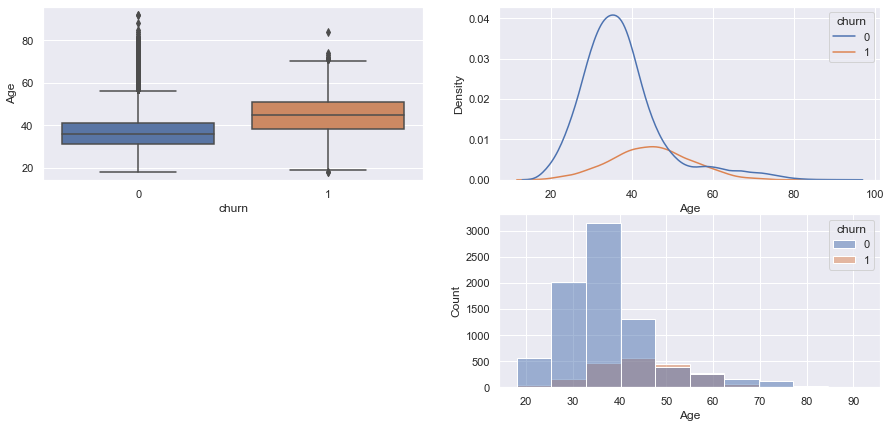

In [77]:
# 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? 
# На какую возрастную категорию клиентов стоит обратить внимание банку?

plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
sns.boxplot(data=churn_data,x='churn',y='Age')
plt.subplot(2,2,2)

sns.kdeplot(data=churn_data,x='Age',hue='churn')
plt.subplot(2,2,4)
sns.histplot(data=churn_data,x='Age',hue='churn',bins=10)
plt.show()

Clients leaving the bank are on average older than staying. But there are a few senior clients who are loyal to the bank, these are potential outliers. The bank should focus on people 40+ because in this category the churn rate is the highest.

<AxesSubplot:xlabel='EstimatedSalary', ylabel='CreditScore'>

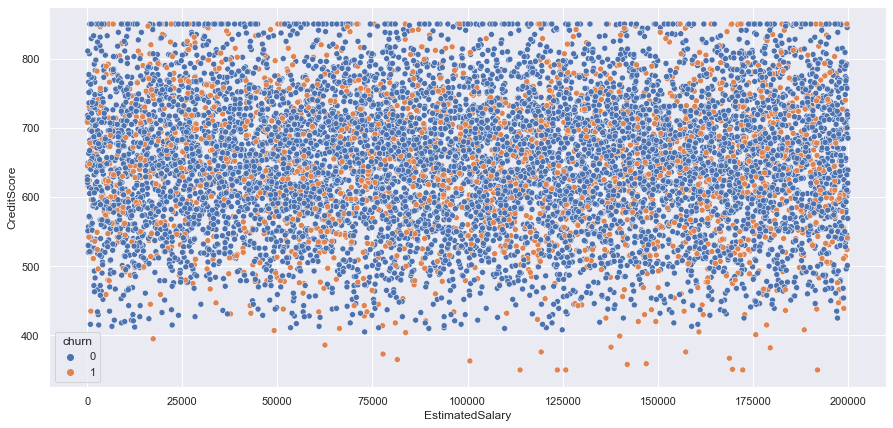

In [78]:
# 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. 
# Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? 
# Если не видите явной взаимосвязи, укажите это.
plt.figure(figsize=(15,7))
sns.scatterplot(data=churn_data,x='EstimatedSalary',y='CreditScore',hue='churn')

There is no noticable corelation between the features.

In [79]:
def categorical_vs_categorical (df,feature_column,target_column,index_order = [],indexed = True):
    df_plot = df.groupby([feature_column, target_column]).size().reset_index().pivot(columns=target_column, index=feature_column, values=0)
    df_plot=df_plot.rename(columns={0:'Existing Customer', 1:'Attrited Customer'})
    if indexed:
        df_plot = df_plot.reindex(index_order)
    # display(df_plot)
    # print(df_plot['0'])
    plt.figure(figsize=(20,5))
    x = df_plot.index
    y1 = df_plot['Existing Customer']
    y2 = df_plot['Attrited Customer']

    snum = y1+y2

    y1 = y1/snum
    y2 = y2/snum

    plt.subplot(1,2,1)

    plt.bar(x, y1, label='Existing')
    plt.bar(x, y2 ,bottom=y1,label='Attrited')
    # plt.ylabel('churn rate')
    plt.title('Proportion of attrited and existing')
    plt.legend()

    df_plot['fr_attrited'] = df_plot['Attrited Customer'] / (df_plot['Attrited Customer'] + df_plot['Existing Customer'])
    df_plot['Total_customer'] = df_plot['Attrited Customer'] + df_plot['Existing Customer']

    
    plt.subplot(1,2,2)
    sns.set()
    df_plot['fr_attrited'].plot(kind='bar')
    plt.ylabel('churn rate')
    plt.title('churn rate vs gender')
    plt.show()

    display(df_plot)

In [80]:
df_plot = churn_data.groupby(['Gender', 'churn']).size().reset_index().pivot(columns='churn', index='Gender', values=0)
df_plot=df_plot.rename(columns={0:'Existing Customer', 1:'Attrited Customer'})
# print(df_plot[['0']])
df_plot.columns

Index(['Existing Customer', 'Attrited Customer'], dtype='object', name='churn')

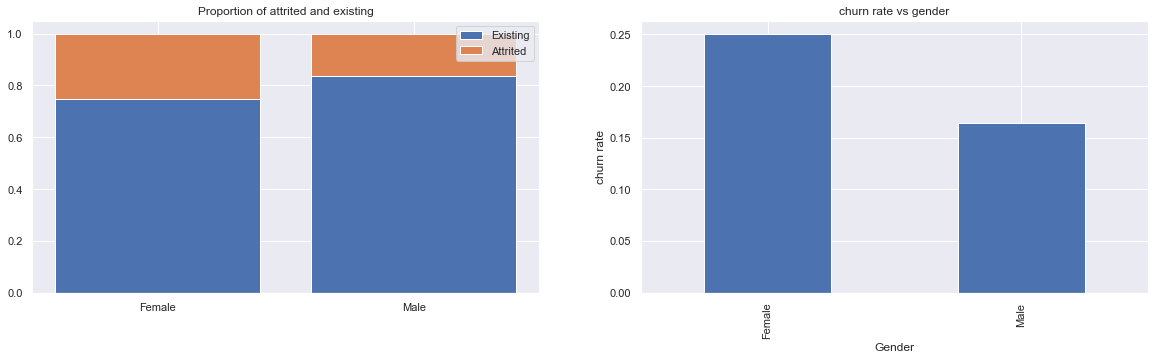

churn,Existing Customer,Attrited Customer,fr_attrited,Total_customer
Gender,,,,
Female,3404,1139,0.250715,4543
Male,4559,898,0.164559,5457


In [81]:
# 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.
# sns.countplot(data=churn_data,x='Gender', hue='churn')

categorical_vs_categorical (churn_data,'Gender','churn',indexed=False)

Churn rate for Females is much greater than for males. Women are 8.5% more likely to leave the bank.

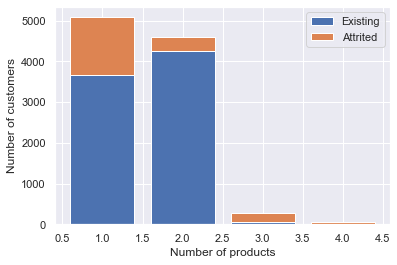

In [131]:
# 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? 
# Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

products = churn_data.groupby(by=['churn','NumOfProducts'],as_index=False).count()[['churn','NumOfProducts','CustomerId']]


x=products[products['churn'] == 1]['NumOfProducts']
y1 = products[products['churn'] == 0]['CustomerId']
y1.loc[3] = 0
y2 = products[products['churn'] == 1]['CustomerId']

plt.bar(x, y1, label='Existing')
plt.bar(x, y2 ,bottom=y1,label='Attrited')
plt.xlabel('Number of products')
plt.ylabel('Number of customers')
plt.legend()

plt.show()

Almost all customers having 3 or more products left the bank. Also the lowes odds of attrition are among the customers using 2 products.

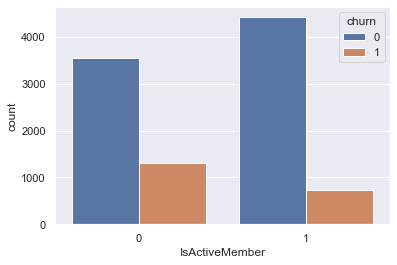

In [133]:
# 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. 
# Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

sns.countplot(data=churn_data, x = 'IsActiveMember', hue='churn')
plt.show()

The churn among active clients is way lower than for non active ones. I'd reccomend to offer benefits of an active client status to a wider auditory.

In [135]:
# 9.9. В какой стране доля ушедших клиентов больше? 
# Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

#преобразуем даты в строки
choropleth_data = churn_data.groupby(by='Geography', as_index=False).mean()[['Geography','churn']]
choropleth_data

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #датафрейм
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой plotly
    color="churn", #от чего зависит цвет
    # range_color=[0, 30e6],
    title='Geographical distribution of churn', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)

#отображаем его
fig.show()

In [137]:
churn_data.groupby(by='Geography', as_index=False).mean()[['Geography','churn','Age','Balance']]

,Geography,churn,Age,Balance
0,France,0.161548,38.511767,62092.636516
1,Germany,0.324432,39.771622,119730.116134
2,Spain,0.166734,38.890997,61818.147763


Clients from Germany are much more prone to attrition it seems since they have on average more money on their bank accounts and as we figured above the bank in question is more appealing to customers not keeping their money there.

<AxesSubplot:>

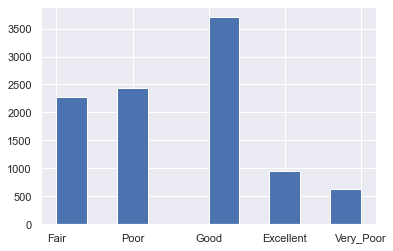

In [143]:
# 9.10. Переведите числовой признак CreditScore в категориальный. Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. 
# Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.

def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data['CreditScoreCat'].hist()

In [155]:
pivot = churn_data.pivot_table(
    values='churn',
    columns='Tenure',
    index='CreditScoreCat',
)
# pivot.columns = pivot.columns.astype('string')
index_order = ['Very_Poor','Poor','Fair','Good','Excellent']
pivot = pivot.reindex(index_order)
display(pivot)
# heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
# heatmap.set_title('Тепловая карта вакцинации', fontsize=16);

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902


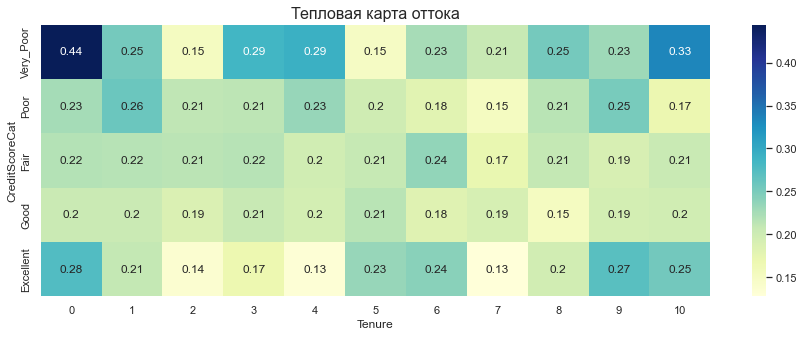

In [157]:
plt.figure(figsize=(15,5))
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu',annot=True)
heatmap.set_title('Тепловая карта оттока', fontsize=16);

<AxesSubplot:xlabel='Tenure'>

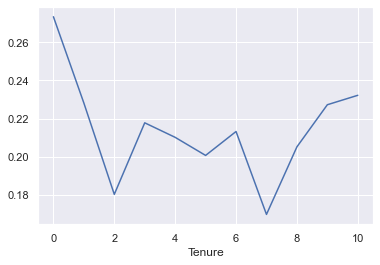

In [162]:
pivot.mean(axis=0).plot(kind='line')

<AxesSubplot:xlabel='CreditScoreCat'>

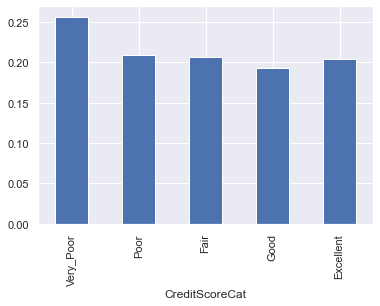

In [160]:
pivot.mean(axis=1).plot(kind='bar')

Churn is the greatest for the clients with Very_pour credit rating and for new klients (tenure = 0). ALso seasoned clients who have been with for 9, 10 years with Excellent credit score also tend to leave.